In [3]:
from google.colab import files
uploaded = files.upload()


Saving cleaned.csv to cleaned.csv


In [4]:
!ls


cleaned.csv  sample_data


In [5]:
import pandas as pd

df = pd.read_csv('cleaned.csv')
df.head()


,job_id,posting_year,country,region,city,company_name,company_size,industry,job_title,seniority_level,...,ai_intensity_score,core_skills,ai_skills,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,reskilling_required,ai_job_displacement_risk,job_description_embedding_cluster,industry_ai_adoption_stage
0,02a69ea8-7c31-4998-a8f8-57b8ed680c19,2014,Canada,North America,Sao Paulo,Prime Analytics,Startup,Education,Data Scientist,Intern,...,0.0,"Python, Communication, Cloud Computing, Softwa...",NaN,78534,-1.27,0.79,False,High,13,Emerging
1,5d509c68-638f-4ee9-b6ee-b9c385b9f981,2015,Thailand,Southeast Asia,Seoul,NextGen Analytics,Medium,Education,Systems Engineer,Intern,...,0.0,"Statistics, Research, Project Management, Pyth...",NaN,29573,1.25,0.64,False,Low,9,Emerging
2,cdfa9da7-4a33-4786-96b8-f3f2cbb4639b,2025,Singapore,Southeast Asia,Tokyo,NextGen Solutions,Large,Retail,Research Scientist,Executive,...,0.0,"Data Analysis, Cloud Computing, Business Analy...",NaN,40733,-3.08,0.70,False,Medium,5,Growing
3,363bd091-a5b4-497e-b5ba-8d4563cc9b1f,2017,Mexico,North America,New York,NextGen Solutions,Medium,Tech,Software Engineer,Intern,...,0.0,"SQL, Research, Communication, Software Enginee...",NaN,93464,3.49,0.76,False,High,11,Growing
4,4d484619-9765-485a-b502-5533909cc520,2016,United Kingdom,Europe,Bangalore,Global Solutions,Medium,Government,Data Scientist,Executive,...,0.0,"Software Engineering, Business Analysis, Pytho...",NaN,66772,-4.06,0.71,False,Medium,8,Emerging


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   job_id                              5000 non-null   object 
 1   posting_year                        5000 non-null   int64  
 2   country                             5000 non-null   object 
 3   region                              5000 non-null   object 
 4   city                                5000 non-null   object 
 5   company_name                        5000 non-null   object 
 6   company_size                        5000 non-null   object 
 7   industry                            5000 non-null   object 
 8   job_title                           5000 non-null   object 
 9   seniority_level                     5000 non-null   object 
 10  ai_mentioned                        5000 non-null   bool   
 11  ai_keywords                         1623 no

In [7]:
df.describe()


,posting_year,ai_intensity_score,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,job_description_embedding_cluster
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2017.519400,0.287312,63096.18480,3.015192,0.586176,9.473000
std,4.638569,0.291377,31431.27151,5.968729,0.250007,5.748763
min,2010.000000,0.000000,15321.00000,-5.000000,0.100000,0.000000
25%,2013.000000,0.070000,36575.50000,-1.580000,0.330000,4.000000
50%,2017.000000,0.150000,60909.50000,1.720000,0.670000,10.000000
75%,2022.000000,0.520000,81811.75000,5.385000,0.790000,14.000000
max,2025.000000,0.950000,161547.00000,17.980000,0.900000,19.000000


In [10]:
df[['ai_intensity_score', 'salary_usd']].corr()


,ai_intensity_score,salary_usd
ai_intensity_score,1.00000,0.41928
salary_usd,0.41928,1.00000


The correlation coefficient between AI intensity and salary is roughly 0.42, indicating a moderate positive relationship. This suggests that roles with higher AI intensity tend to offer higher salaries.

In [11]:
df[['ai_intensity_score', 'automation_risk_score']].corr()

,ai_intensity_score,automation_risk_score
ai_intensity_score,1.000000,-0.875102
automation_risk_score,-0.875102,1.000000


The correlation between AI intensity and automation risk is roughly -0.88, indicating a very strong negative relationship. This suggests that roles requiring higher AI intensity are significantly less exposed to automation risk.

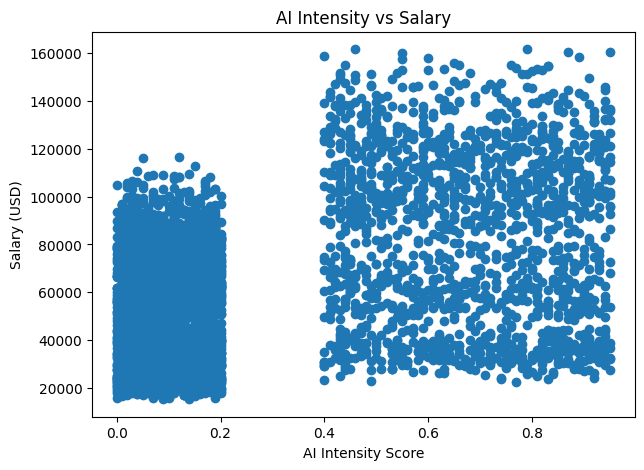

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df['ai_intensity_score'], df['salary_usd'])
plt.xlabel('AI Intensity Score')
plt.ylabel('Salary (USD)')
plt.title('AI Intensity vs Salary')
plt.show()

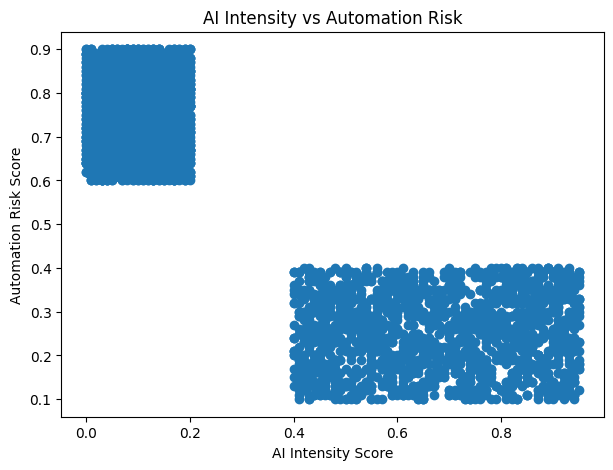

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(df['ai_intensity_score'], df['automation_risk_score'])
plt.xlabel('AI Intensity Score')
plt.ylabel('Automation Risk Score')
plt.title('AI Intensity vs Automation Risk')
plt.show()

In [15]:
df['ai_band'] = pd.cut(
    df['ai_intensity_score'],
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    labels=['0-0.2','0.2-0.4','0.4-0.6','0.6-0.8','0.8-1.0'],
    include_lowest=True
)

summary = df.groupby('ai_band', observed=True).agg(
    avg_salary_usd=('salary_usd','mean'),
    avg_automation_risk=('automation_risk_score','mean'),
    job_count=('job_id','count')
).reset_index()

summary


,ai_band,avg_salary_usd,avg_automation_risk,job_count
0,0-0.2,53123.575363,0.748783,3377
1,0.2-0.4,75629.200000,0.266500,20
2,0.4-0.6,85885.811419,0.252907,578
3,0.6-0.8,84062.471349,0.239649,541
4,0.8-1.0,81508.739669,0.250165,484


In [18]:
df['ai_band_q'] = pd.qcut(df['ai_intensity_score'], q=4, labels=['Q1 (Lowest)','Q2','Q3','Q4 (Highest)'])

summary_q = df.groupby('ai_band_q').agg(
    avg_salary_usd=('salary_usd','mean'),
    avg_automation_risk=('automation_risk_score','mean'),
    job_count=('job_id','count')
).reset_index()

summary_q

/tmp/ipython-input-3753768294.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_q = df.groupby('ai_band_q').agg(


,ai_band_q,avg_salary_usd,avg_automation_risk,job_count
0,Q1 (Lowest),53038.257075,0.744756,1272
1,Q2,53178.884897,0.751239,1364
2,Q3,64662.754011,0.581301,1122
3,Q4 (Highest),82873.310789,0.246892,1242


In [19]:
summary_q.to_csv('outputs_ai_quartile_summary.csv', index=False)

In [20]:
!ls

cleaned.csv		     outputs_ai_quartile_summary.csv
outputs_ai_band_summary.csv  sample_data


In [21]:
from google.colab import files
files.download('outputs_ai_quartile_summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>